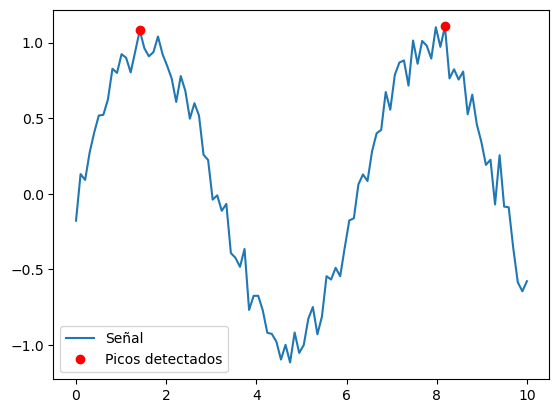

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Crear datos de ejemplo
x = np.linspace(0, 10, 100)
data = np.sin(x) + np.random.normal(0, 0.1, x.shape)

# Detectar picos con diferentes condiciones
peaks, properties = find_peaks(data, height=0.5, prominence=0.3, distance=5)

# Graficar la señal y los picos detectados
plt.plot(x, data, label="Señal")
plt.plot(x[peaks], data[peaks], "ro", label="Picos detectados")
plt.legend()
plt.show()


In [2]:
data2 =[1, 2, 3, 4, 5, 6,2,1,2,3,4,5,6,7,1,2,4]

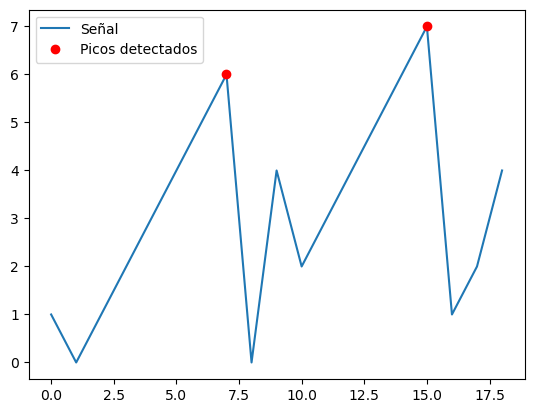

In [20]:

# Datos
data2 = [1,0,1, 2, 3, 4, 5, 6, 0, 4, 2, 3, 4, 5, 6, 7, 1, 2, 4]

# Crear el eje X
x = np.arange(len(data2))

# Detectar picos
peaks, properties = find_peaks(data2, height=3.5, prominence=6, distance=2)

#distance, distancia minima entre un pico y el siguiente
#height, altura minima del pico


# Graficar la señal y los picos detectados
plt.plot(x, data2, label="Señal")
plt.plot(x[peaks], np.array(data2)[peaks], "ro", label="Picos detectados")  # Corregido
plt.legend()
plt.show()